## 1. Import Necessary Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
import plotly
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load the Dataset

In [3]:
DataSet = r"Data/iris.csv"

In [46]:
df = pd.read_csv(DataSet)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Explore the Dataset

In [47]:
# Dataset Info
print("Dataset Info:")
df.info()

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for the distribution of the target variable
print("\nDistribution of species:")
print(df['species'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     

## 4. Visualize the Data

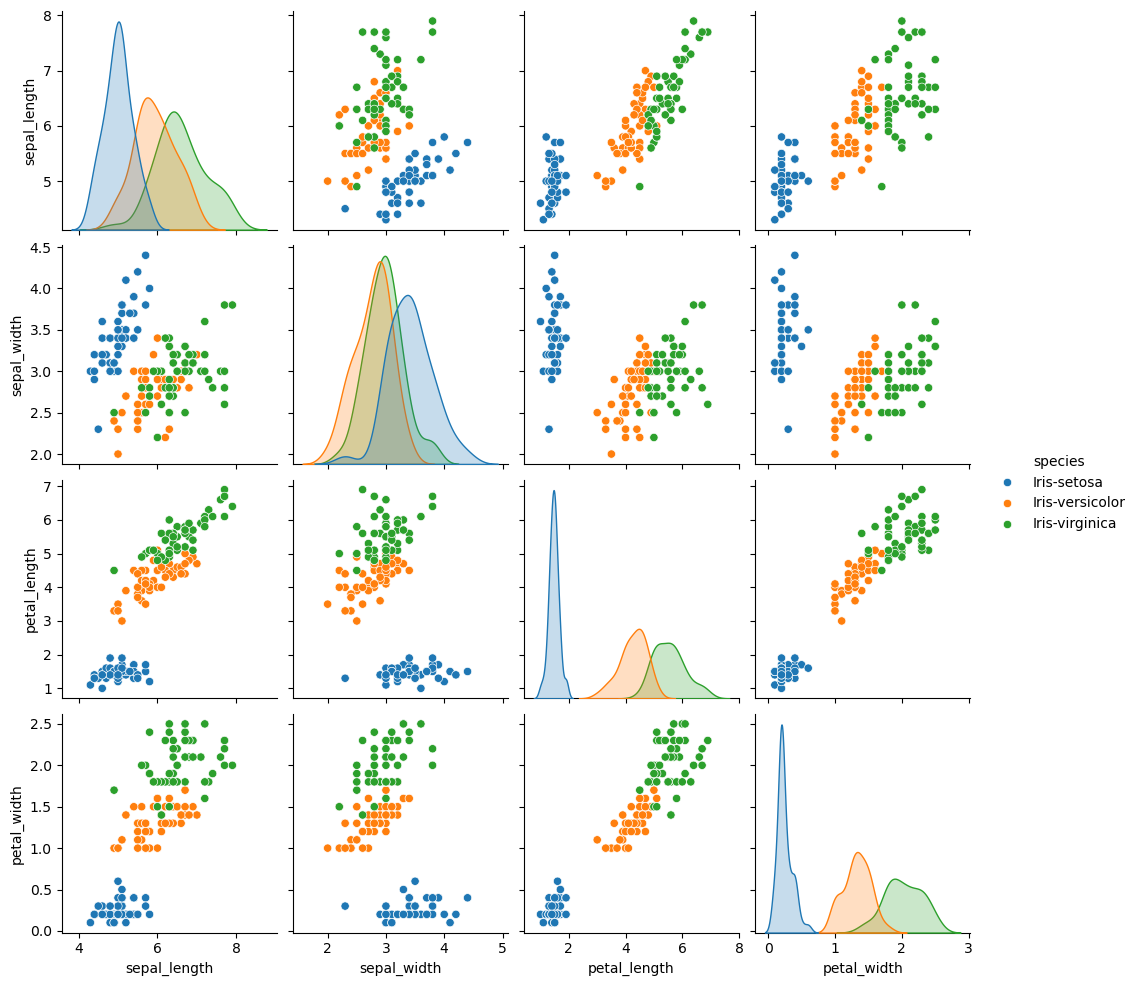

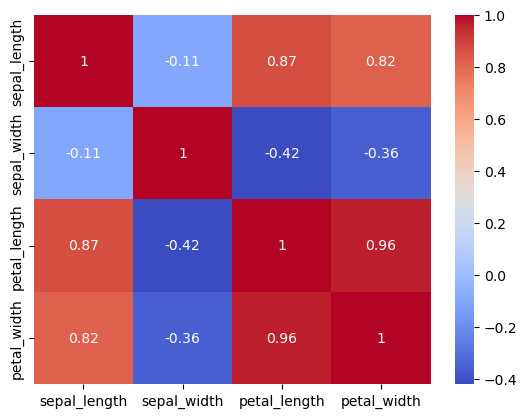

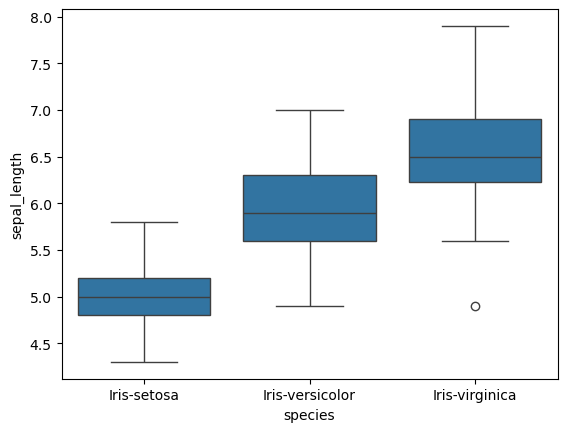

In [48]:
# Pairplot to visualize the relationship between features
sns.pairplot(df, hue='species')
plt.show()

# Correlation heatmap for numeric features
correlation = df.drop('species', axis=1).corr()  # Drop 'species' column for correlation
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

# Boxplot to visualize outliers for one of the features
sns.boxplot(x="species", y="sepal_length", data=df)
plt.show()

## 5. Handle Missing Values (if any)

In [50]:
# Impute missing values in the 'species' column with the most frequent value (mode)
df['species'] = df['species'].fillna(df['species'].mode()[0])

# Check if there are any missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## 6. Handle Categorical Data

In [51]:
# Convert the 'species' column to numeric values
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Check the changes
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


## 7. Feature and Target Separation

In [52]:
# Separate the features (X) and target variable (y)
X = df.drop('species', axis=1)  # Features (all columns except 'species')
y = df['species']  # Target variable

## 8. Scale the Data

In [53]:
# Standardize the data (scale the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 9. Train-Test Split

In [54]:
# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the resulting train and test sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 120
Test set size: 30


## 10. Initialize and Train the Model

In [55]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 11. Model Evaluation


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



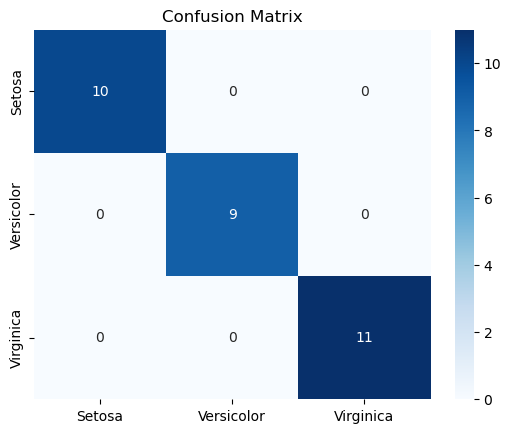

In [56]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix')
plt.show()